In [1]:
import pandas as pd

In [9]:
result_df = pd.read_csv('data/merge/데이터취합.csv')

In [3]:
import statsmodels.api as sm

In [10]:
# 각 열의 평균 계산
avg_pm10 = result_df['AVG_PM10'].mean()
avg_pm25 = result_df['AVG_PM2.5'].mean()
avg_일산화 = result_df['AVG_일산화'].mean()
avg_오존 = result_df['AVG_오존'].mean()
avg_이산화 = result_df['AVG_이산화'].mean()
avg_아황산 = result_df['AVG_아황산'].mean()
avg_납 = result_df['AVG_납'].mean()

# 결측치를 해당 열의 평균값으로 대체
result_df['AVG_PM10'] = result_df['AVG_PM10'].fillna(avg_pm10)
result_df['AVG_PM2.5'] = result_df['AVG_PM2.5'].fillna(avg_pm25)
result_df['AVG_일산화'] = result_df['AVG_일산화'].fillna(avg_일산화)
result_df['AVG_오존'] = result_df['AVG_오존'].fillna(avg_오존)
result_df['AVG_이산화'] = result_df['AVG_이산화'].fillna(avg_이산화)
result_df['AVG_아황산'] = result_df['AVG_아황산'].fillna(avg_아황산)
result_df['AVG_납'] = result_df['AVG_납'].fillna(avg_납)

# 모델 구축
X = result_df[['AVG_PM10', 'AVG_PM2.5', 'AVG_일산화', 'AVG_오존', 'AVG_이산화', 'AVG_아황산', 'AVG_납']]
y = result_df['천식환자수']

# OLS 모델 생성 및 적합
model = sm.OLS(y, X).fit()

# 결과 요약 출력
print(model.summary())


                                 OLS Regression Results                                
Dep. Variable:                  천식환자수   R-squared (uncentered):                   0.630
Model:                            OLS   Adj. R-squared (uncentered):              0.629
Method:                 Least Squares   F-statistic:                              349.1
Date:                Tue, 21 Nov 2023   Prob (F-statistic):                   2.84e-304
Time:                        16:40:13   Log-Likelihood:                         -15677.
No. Observations:                1440   AIC:                                  3.137e+04
Df Residuals:                    1433   BIC:                                  3.141e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

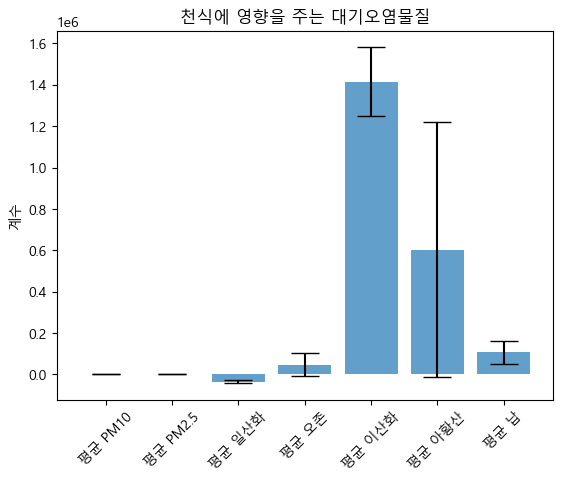

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 회귀 계수 및 신뢰 구간 추출
coefficients = model.params
conf = model.conf_int()
errors = conf[1] - coefficients

# 막대 그래프 생성
variables = ['평균 PM10', '평균 PM2.5', '평균 일산화', '평균 오존', '평균 이산화', '평균 아황산', '평균 납']
x_pos = np.arange(len(variables))

# 막대 그래프 시각화
plt.bar(x_pos, coefficients, yerr=errors, align='center', alpha=0.7, capsize=10)
plt.xticks(x_pos, variables, rotation=45)
plt.ylabel('계수')
plt.title('천식에 영향을 주는 대기오염물질')

# 그래프 표시
plt.show()

이 회귀 분석 결과는 대기 오염 물질이 천식 환자 수에 미치는 영향을 평가한 것입니다. 모델은 천식 환자 수 변동의 약 63%를 설명합니다(R-squared = 0.630). 이산화질소의 영향력이 가장 크며(p-value < 0.000), 통계적으로 유의미한 긍정적 영향을 미치는 것으로 나타났습니다. 납도 유의미한 영향을 미칩니다(p-value < 0.000). 반면, PM10과 PM2.5는 유의미한 영향을 주지 않습니다(p-value > 0.05).

일산화질소는 음의 계수를 가지며, 이는 높은 일산화질소 수치가 천식 환자 수 감소와 관련이 있음을 시사하지만, 이는 일반적인 예상과 다르므로 추가적인 조사가 필요합니다.

모델의 조건 수(Cond. No.)가 매우 높아, 다중공선성이나 다른 수치적 문제가 있을 수 있음을 나타냅니다. 이는 독립 변수들 간의 과도한 상관관계가 있을 수 있음을 의미하므로, 변수 선택이나 차원 축소 기법을 고려할 필요가 있습니다.

이 결과를 바탕으로, 대기 오염 물질 중 특히 이산화질소와 납이 천식 환자 수에 중요한 영향을 미치는 것으로 볼 수 있으며, 이는 공중 보건 정책 수립에 있어 중요한 지표가 될 수 있습니다.

In [18]:

# 각 열의 평균 계산
avg_pm10 = result_df['AVG_PM10'].mean()
avg_pm25 = result_df['AVG_PM2.5'].mean()
avg_일산화 = result_df['AVG_일산화'].mean()
avg_오존 = result_df['AVG_오존'].mean()
avg_이산화 = result_df['AVG_이산화'].mean()
avg_아황산 = result_df['AVG_아황산'].mean()
avg_납 = result_df['AVG_납'].mean()

# 결측치를 해당 열의 평균값으로 대체
result_df['AVG_PM10'] = result_df['AVG_PM10'].fillna(avg_pm10)
result_df['AVG_PM2.5'] = result_df['AVG_PM2.5'].fillna(avg_pm25)
result_df['AVG_일산화'] = result_df['AVG_일산화'].fillna(avg_일산화)
result_df['AVG_오존'] = result_df['AVG_오존'].fillna(avg_오존)
result_df['AVG_이산화'] = result_df['AVG_이산화'].fillna(avg_이산화)
result_df['AVG_아황산'] = result_df['AVG_아황산'].fillna(avg_아황산)
result_df['AVG_납'] = result_df['AVG_납'].fillna(avg_납)

# 모델 구축
X = result_df[['AVG_PM10', 'AVG_PM2.5', 'AVG_일산화', 'AVG_오존', 'AVG_이산화', 'AVG_아황산', 'AVG_납']]
y = result_df['비염환자수']

# OLS 모델 생성 및 적합
model2 = sm.OLS(y, X).fit()

# 결과 요약 출력
print(model2.summary())

                                 OLS Regression Results                                
Dep. Variable:                  비염환자수   R-squared (uncentered):                   0.591
Model:                            OLS   Adj. R-squared (uncentered):              0.589
Method:                 Least Squares   F-statistic:                              295.4
Date:                Tue, 21 Nov 2023   Prob (F-statistic):                   1.32e-272
Time:                        17:29:00   Log-Likelihood:                         -18872.
No. Observations:                1440   AIC:                                  3.776e+04
Df Residuals:                    1433   BIC:                                  3.779e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------


이 회귀 분석 결과는 대기 오염 물질과 비염 환자 수 간의 관계를 평가합니다. 모델은 비염 환자 수 변동의 약 59.1%를 설명하며(R-squared = 0.591), 특히 이산화질소가 가장 강력한 긍정적 영향을 미치는 것으로 나타났습니다. 오존과 납 역시 비염 환자 수에 유의미한 긍정적 영향을 미치며, 일산화질소는 음의 영향을 나타냅니다. 다만, 높은 조건 수는 다중공선성이나 수치적 문제가 있을 수 있음을 암시하므로 주의가 필요합니다. 이 결과는 대기 오염이 비염 발생에 미치는 영향을 이해하는 데 중요한 정보를 제공합니다.

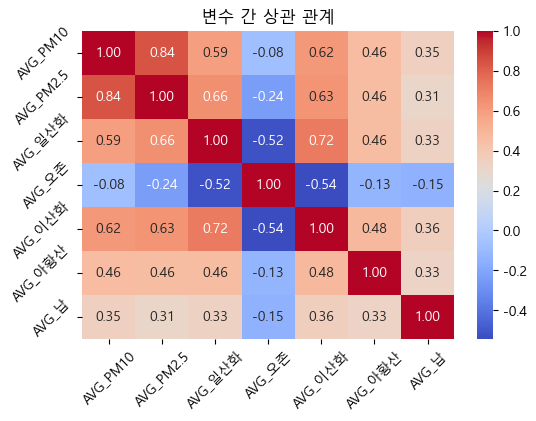

In [21]:
import seaborn as sns
# 상관 계수 행렬 계산
corr_matrix = X.corr()

# Heatmap 그리기
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')

# 레이블 및 타이틀 설정
plt.title('변수 간 상관 관계')
plt.xticks(rotation=45)
plt.yticks(rotation=45)

# 그래프 표시
plt.show()

c:\Users\human\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\human\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\human\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


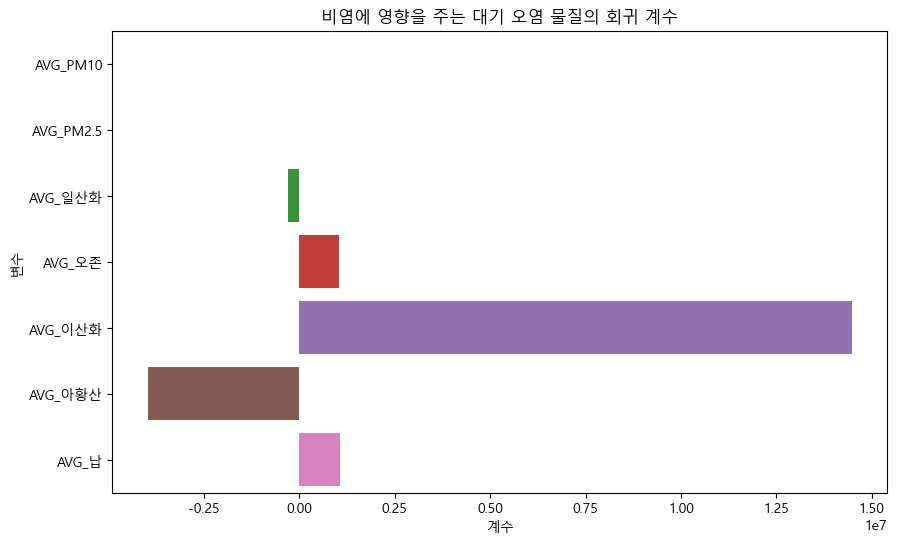

In [22]:
# 회귀 계수를 데이터프레임으로 변환
coeff_df = pd.DataFrame({'Variable': X.columns, 'Coefficient': model2.params})

# Seaborn을 사용한 막대 그래프
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Variable', data=coeff_df)

# 레이블 및 타이틀 설정
plt.title('비염에 영향을 주는 대기 오염 물질의 회귀 계수')
plt.xlabel('계수')
plt.ylabel('변수')

# 그래프 표시
plt.show()

In [24]:
import plotly.graph_objects as go

# 계수와 신뢰 구간 데이터 준비
coefficients = model2.params
conf_int = model2.conf_int()
variables = X.columns

# 인터랙티브 그래프 생성
fig = go.Figure()

# 각 변수에 대해 계수와 신뢰 구간 추가
for i, var in enumerate(variables):
    fig.add_trace(go.Scatter(
        x=[conf_int[0][i], conf_int[1][i]],
        y=[var, var],
        mode="lines",
        line=dict(color="black"),
        showlegend=False
    ))
    fig.add_trace(go.Scatter(
        x=[coefficients[i]],
        y=[var],
        mode="markers",
        marker=dict(color="red", size=10),
        name=f"계수: {coefficients[i]:.2f}"
    ))

# 레이아웃 설정
fig.update_layout(
    title="비염에 영향을 주는 대기 오염 물질의 회귀 계수 및 신뢰 구간",
    xaxis_title="계수",
    yaxis_title="변수"
)

# 그래프 표시
fig.show()

C:\Users\human\AppData\Local\Temp\ipykernel_11992\3497114870.py:14: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\human\AppData\Local\Temp\ipykernel_11992\3497114870.py:21: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\human\AppData\Local\Temp\ipykernel_11992\3497114870.py:25: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



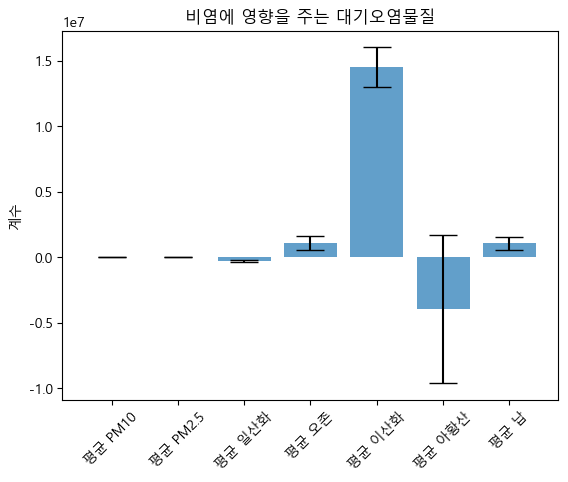

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 회귀 계수 및 신뢰 구간 추출
coefficients = model2.params
conf = model2.conf_int()
errors = conf[1] - coefficients

# 막대 그래프 생성
variables = ['평균 PM10', '평균 PM2.5', '평균 일산화', '평균 오존', '평균 이산화', '평균 아황산', '평균 납']
x_pos = np.arange(len(variables))

# 막대 그래프 시각화
plt.bar(x_pos, coefficients, yerr=errors, align='center', alpha=0.7, capsize=10)
plt.xticks(x_pos, variables, rotation=45)
plt.ylabel('계수')
plt.title('비염에 영향을 주는 대기오염물질')

# 그래프 표시
plt.show()

In [25]:

# 각 열의 평균 계산
avg_pm10 = result_df['AVG_PM10'].mean()
avg_pm25 = result_df['AVG_PM2.5'].mean()
avg_일산화 = result_df['AVG_일산화'].mean()
avg_오존 = result_df['AVG_오존'].mean()
avg_이산화 = result_df['AVG_이산화'].mean()
avg_아황산 = result_df['AVG_아황산'].mean()
avg_납 = result_df['AVG_납'].mean()

# 결측치를 해당 열의 평균값으로 대체
result_df['AVG_PM10'] = result_df['AVG_PM10'].fillna(avg_pm10)
result_df['AVG_PM2.5'] = result_df['AVG_PM2.5'].fillna(avg_pm25)
result_df['AVG_일산화'] = result_df['AVG_일산화'].fillna(avg_일산화)
result_df['AVG_오존'] = result_df['AVG_오존'].fillna(avg_오존)
result_df['AVG_이산화'] = result_df['AVG_이산화'].fillna(avg_이산화)
result_df['AVG_아황산'] = result_df['AVG_아황산'].fillna(avg_아황산)
result_df['AVG_납'] = result_df['AVG_납'].fillna(avg_납)

# 모델 구축
X = result_df[['AVG_PM10', 'AVG_PM2.5', 'AVG_일산화', 'AVG_오존', 'AVG_이산화', 'AVG_아황산', 'AVG_납']]
y = result_df['아토피환자수']

# OLS 모델 생성 및 적합
model3 = sm.OLS(y, X).fit()

# 결과 요약 출력
print(model3.summary())

                                 OLS Regression Results                                
Dep. Variable:                 아토피환자수   R-squared (uncentered):                   0.547
Model:                            OLS   Adj. R-squared (uncentered):              0.545
Method:                 Least Squares   F-statistic:                              247.2
Date:                Tue, 21 Nov 2023   Prob (F-statistic):                   3.58e-241
Time:                        17:40:33   Log-Likelihood:                         -15283.
No. Observations:                1440   AIC:                                  3.058e+04
Df Residuals:                    1433   BIC:                                  3.062e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

이 회귀 분석은 아토피 환자 수에 영향을 미치는 대기 오염 물질들 간의 관계를 조사합니다. 모델은 아토피 환자 수 변동의 약 54.7%를 설명합니다(R-squared = 0.547). 이산화질소가 가장 강력한 양의 영향을 미치며, 오존 또한 아토피 환자 수에 상당한 긍정적 영향을 주는 것으로 나타났습니다. 반면, 아황산은 아토피 환자 수 감소와 관련이 있는 것으로 보이며, PM10과 PM2.5도 부정적인 영향을 주는 것으로 나타났습니다. 다만, 모델의 높은 조건 수는 변수 간의 다중공선성 문제를 시사하므로, 이는 결과의 해석에 주의를 요합니다.

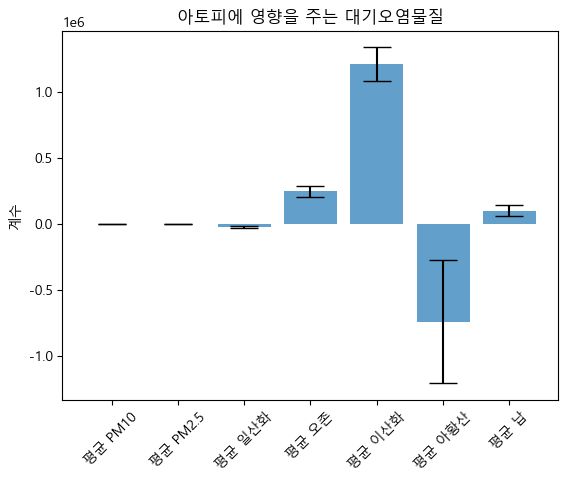

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 회귀 계수 및 신뢰 구간 추출
coefficients = model3.params
conf = model3.conf_int()
errors = conf[1] - coefficients

# 막대 그래프 생성
variables = ['평균 PM10', '평균 PM2.5', '평균 일산화', '평균 오존', '평균 이산화', '평균 아황산', '평균 납']
x_pos = np.arange(len(variables))

# 막대 그래프 시각화
plt.bar(x_pos, coefficients, yerr=errors, align='center', alpha=0.7, capsize=10)
plt.xticks(x_pos, variables, rotation=45)
plt.ylabel('계수')
plt.title('아토피에 영향을 주는 대기오염물질')

# 그래프 표시
plt.show()